# Laboratorio de regresión logística

|                |   |
:----------------|---|
| **Nombre**     |  Miguel Aaron Castillon Ochoa |
| **Fecha**      |  06/10/2025 |
| **Expediente** |  751858 | 

La regresión logística es una herramienta utilizada para predecir respuestas cualitativas. Al igual que la regresión lineal, es un método sencillo que sirve como un punto de partida para técnicas más avanzadas. Por ejemplo, lo que se conoce como *redes neuronales* o *red de perceptrones multicapa* no es más que una estructura de regresiones logísticas que se alimentan entre sí.

1. Descarga el archivo de créditos y carga los datos (Default.csv). Utiliza `pandas`.

In [1]:
import pandas as pd

In [6]:
data = pd.read_csv("Default.csv")

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


2. Utiliza el comando `obj.head()`, donde `obj` es el nombre que le diste a los datos del archivo.

In [8]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138950
3,No,No,529.250605,35704.493940
4,No,No,785.655883,38463.495880


El comando head arroja los primeras *n* líneas (por defecto 5) de los datos que están en el DataFrame.

3. Utiliza el comando `obj.describe()`.

In [9]:
data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729275
max,2654.322576,73554.233500


El comando describe toma las columnas que tienen datos numéricos y saca datos estadísticos comunes:
- *n*
- media
- desviación estándar
- valor mínimo
- primer cuartil
- mediana
- tercer cuartil
- valor máximo

3. Vistos estos datos, ¿qué columnas existen en el DataFrame? ¿Qué tipo de datos contienen?

Al cargar el archivo Default.csv con la librería pandas, se obtuvo un DataFrame que contiene información de 10,000 observaciones y cuatro columnas: default, student, balance e income. La variable default es de tipo cualitativo y representa si el individuo incumplió el pago de su deuda, con dos posibles valores: “Yes” o “No”. La variable student también es cualitativa e indica si el individuo es estudiante o no. Por otro lado, balance e income son variables cuantitativas que representan, respectivamente, el saldo promedio de la tarjeta de crédito y el ingreso anual del individuo.

El análisis estadístico mediante el comando data.describe() muestra que las variables numéricas presentan las siguientes características: en el caso de balance, el promedio es de 835.37 con una desviación estándar de 483.71, evidenciando una dispersión moderada entre los saldos de los usuarios. Los valores varían desde 0 hasta 2654.32, siendo 823.64 el valor mediano. En cuanto a income, el ingreso promedio es de 33,516.98 con una desviación estándar de 13,336.64, lo cual refleja una alta variabilidad económica entre los individuos. El ingreso mínimo registrado es de 771.97 y el máximo de 73,554.23, con una mediana de 34,552.64.

En conjunto, estos resultados permiten identificar que el conjunto de datos combina variables cualitativas y cuantitativas, lo que lo hace adecuado para aplicar un modelo de regresión logística con el objetivo de predecir la probabilidad de incumplimiento (default) a partir de las características económicas y académicas de los individuos.

4. Configura el tipo de dato de las columnas `default` y `student` para cambiarlos a variables categóricas.

`data[columna] = data[columna].astype("category")`

In [10]:
data["default"] = data["default"].astype("category")
data["student"] = data["student"].astype("category")

In [11]:
print(data.dtypes)

default    category
student    category
balance     float64
income      float64
dtype: object


Imagina que trabajas en un banco y que se te entregan estos datos. Tu objetivo es crear un modelo que ayude a predecir si una persona que solicita un crédito lo va a pagar. Exploremos los datos un poco más antes de crear un modelo.

Veamos primero cómo es la distribución de los valores cuando una persona dejó de pagar y cuando siguió pagando. `Default` es el término utilizado para cuando una persona dejó de pagar.

5. Crea una gráfica de caja para las columnas `income` y `balance`, con los datos agrupados con la columna `default`. Utiliza el comando `obj.boxplot(column=____, by=_____)`

In [12]:
import matplotlib.pyplot as plt

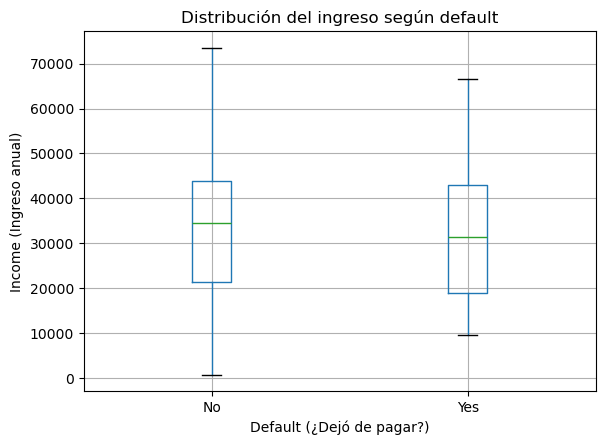

In [13]:
# Gráfica de caja para income agrupado por default
data.boxplot(column="income", by="default")
plt.title("Distribución del ingreso según default")
plt.suptitle("")  # Elimina el título automático extra
plt.xlabel("Default (¿Dejó de pagar?)")
plt.ylabel("Income (Ingreso anual)")
plt.show()

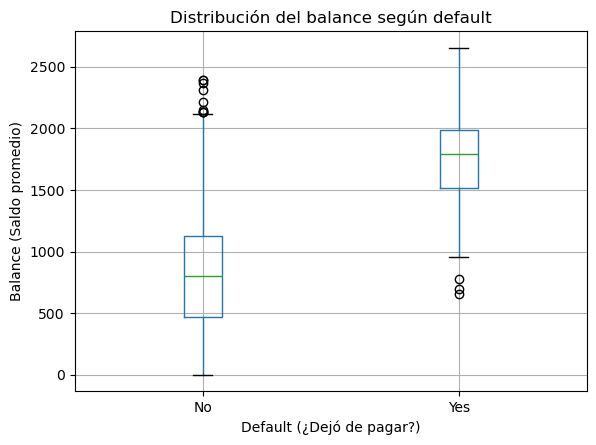

In [14]:
# Gráfica de caja para balance agrupado por default
data.boxplot(column="balance", by="default")
plt.title("Distribución del balance según default")
plt.suptitle("")
plt.xlabel("Default (¿Dejó de pagar?)")
plt.ylabel("Balance (Saldo promedio)")
plt.show()

6. Crea una gráfica de dispersión donde el eje *x* sea la columna `balance` y el eje *y* la columna `income`. Utiliza el comando `obj.plot.scatter(x, y, c="default", colormap="PiYG_r", alpha=0.5)`.

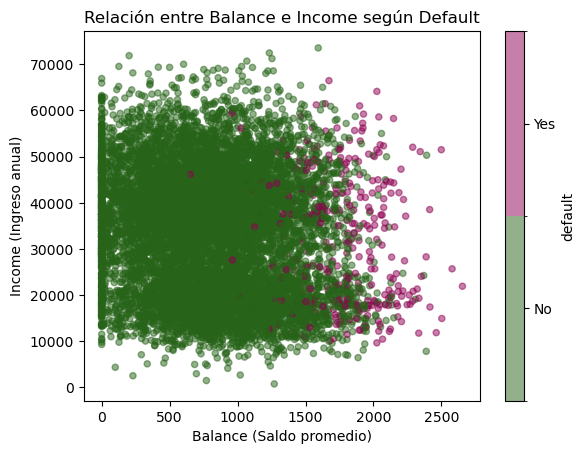

In [15]:
# Gráfica de dispersión entre balance e income, coloreada por default
data.plot.scatter(
    x="balance",
    y="income",
    c="default",
    colormap="PiYG_r",
    alpha=0.5
)

plt.title("Relación entre Balance e Income según Default")
plt.xlabel("Balance (Saldo promedio)")
plt.ylabel("Income (Ingreso anual)")
plt.show()


La regresión (lineal o logística) se usa para encontrar una línea que ajuste los datos para tomar una decisión. La línea que buscamos en regresión logística es aquella que nos ayude a separar las diferentes categorías. 

<img style="float: left; " src="https://www.baeldung.com/wp-content/uploads/sites/4/2023/10/decision_boundary_curve.jpg" width="400px" />


## Regresión logística simple

Creemos un modelo simple donde sólo utilizamos una de los factores para predecir una respuesta. Quiero conocer la probabilidad de que una persona deje de pagar su crédito dado el balance que tiene en su cuenta.

$$ P(\text{default}=\text{Yes}|\text{balance}) $$

Por el momento la columna default no contiene valores numéricos, por lo que hay que transformar los datos. Como default es nuestra variable de respuesta (lo que queremos predecir) podemos nombrarla *y*.

Ejecuta el código `y = obj["default"] == "Yes"`. Extrae el factor `balance` en una variable *x*.

In [16]:
# Crear la variable de respuesta (y)
y = data["default"] == "Yes"

In [17]:
# Crear la variable predictora (x)
x = data["balance"]


In [18]:
# Verificar las primeras filas
print(y.head())
print(x.head())

0    False
1    False
2    False
3    False
4    False
Name: default, dtype: bool
0     729.526495
1     817.180407
2    1073.549164
3     529.250605
4     785.655883
Name: balance, dtype: float64


Crea un gráfico de dispersión donde el eje *x* sea `balance` y el eje *y* sea `default` transformado.

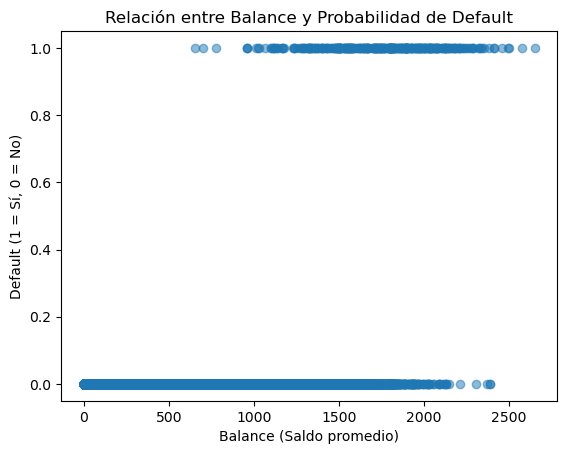

In [19]:
# Gráfico de dispersión entre balance y default transformado
plt.scatter(x, y, alpha=0.5)
plt.title("Relación entre Balance y Probabilidad de Default")
plt.xlabel("Balance (Saldo promedio)")
plt.ylabel("Default (1 = Sí, 0 = No)")
plt.show()

La línea que utilizaremos para predecir la probabilidad es:

$$ p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x)}} $$

Para nuestro ejemplo de pagos y balance:

$$ P(\text{default}=1|\text{balance}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance})}} $$

Buscamos maximizar la probabilidad de que el modelo tome decisiones correctas. Es decir, que cuando `default` fue verdadero, que la predicción sea 100%, y que cuando `default` fue falso que la predicción sea 0%.

$$ \Pi_{i:y_i=1} p(x_i) \Pi_{i':y_{i'}} (1-p(x_{i'})) $$

La función de costo ya simplificada es la siguiente:

$$ J(\vec{\beta}) = -  \sum_{i=1}^n{[y_i \ln{(\hat{p}(x_i))} + (1-y_i)\ln{(1 - \hat{p}(x_i))}]}$$

Utiliza la clase `LogisticRegression` del módulo `linear_model` de la librería `sklearn` para estimar los parámetros del modelo.

In [20]:
from sklearn.linear_model import LogisticRegression
import numpy as np

In [21]:
# Asegura que X sea 2D (sklearn lo requiere)
X = x.values.reshape(-1, 1)   # x = data["balance"]
y_bin = y.astype(int)         # y = (data["default"] == "Yes")

In [22]:
# Ajustar el modelo (penalización L2 por defecto)
logit = LogisticRegression(max_iter=1000)  # subimos iteraciones por estabilidad
logit.fit(X, y_bin)

LogisticRegression(max_iter=1000)

In [23]:
# Parámetros estimados
intercepto = logit.intercept_[0]
beta_balance = logit.coef_[0, 0]

print("Intercepto (β0):", intercepto)
print("Coeficiente balance (β1):", beta_balance)

Intercepto (β0): -10.651328236144845
Coeficiente balance (β1): 0.005498915546890768


In [24]:
# (Opcional) Probabilidad estimada de default para cada observación
p_hat = logit.predict_proba(X)[:, 1]
print("Probabilidades (primeras 5):", p_hat[:5])

Probabilidades (primeras 5): [0.00130568 0.0021126  0.00859475 0.00043444 0.00177696]


Muchos aspectos de la regresión logística son similares a la regresión lineal. Podemos medir la precisión de nuestros estimados calculando sus errores estándar. El objetivo de calcular estos errores es asegurar que hay una relación estadísticamente significativa entre el factor y la variable de respuesta.

Los errores estándar se obtienen con el siguiente procedimiento:

1. Calcula las predicciones utilizando los $\beta_0$ y $\beta_1$ encontrados.

In [25]:
# Calcular las probabilidades estimadas de default (p̂)
p_hat = logit.predict_proba(X)[:, 1]

# Mostrar las primeras
print(p_hat[:5])


[0.00130568 0.0021126  0.00859475 0.00043444 0.00177696]


2. Idealmente la probabilidad debería ser 100% o 0%. Si alguna predicción no fue absoluta significa que hay incertidumbre. Calcula $p(1-p)$ para todas tus predicciones.

In [26]:
# Calcular p(1-p) para todas las predicciones
p_var = p_hat * (1 - p_hat)

# Mostrar las primeras observaciones
print(p_var[:10])


[1.30397665e-03 2.10813447e-03 8.52087844e-03 4.34248798e-04
 1.77380208e-03 3.69043612e-03 2.20654372e-03 2.01211203e-03
 1.36416417e-02 2.36682617e-05]


3. Crea una matriz vacía y llena la diagonal con las probabilidades encontradas.

`V = np.diagflat(*p(1-p)*)`

In [27]:
import numpy as np

# Crear la matriz diagonal con los valores de p(1-p)
V = np.diagflat(p_var)

# Verificar dimensiones y una pequeña parte de la matriz
print(V.shape)
print(V[:5, :5])  # muestra una porción de la matriz


(10000, 10000)
[[0.00130398 0.         0.         0.         0.        ]
 [0.         0.00210813 0.         0.         0.        ]
 [0.         0.         0.00852088 0.         0.        ]
 [0.         0.         0.         0.00043425 0.        ]
 [0.         0.         0.         0.         0.0017738 ]]


4. Calcula la matriz de covarianza. (Dado que X es la matriz que contiene todos los factores)

`cov = np.linalg.inv(X.T @ V @ X)`

In [28]:
# 1️⃣ Crear la matriz X con una columna de 1s (intercepto) y la variable balance
X_design = np.column_stack((np.ones(len(X)), X))  # X = balance.reshape(-1,1)

# 2️⃣ Calcular la matriz de covarianza
cov = np.linalg.inv(X_design.T @ V @ X_design)

# 3️⃣ Mostrar la matriz resultante
print("Matriz de covarianza:")
print(cov)

Matriz de covarianza:
[[ 1.30442757e-01 -7.81757265e-05]
 [-7.81757265e-05  4.85656561e-08]]


5. Los valores en la diagonal de la matriz de covarianza corresponden a la varianza de los factores. Utiliza los valores de la diagonal para calcular el error estándar.

`se = np.sqrt(np.diag(cov))`

In [29]:
# Calcular errores estándar de los coeficientes
se = np.sqrt(np.diag(cov))

print("Errores estándar (SE):")
print(se)


Errores estándar (SE):
[3.61168600e-01 2.20376169e-04]


Ahora, revisemos si los estimados de nuestros coeficientes demuestran que hay una relación significativa entre los factores y la respuesta.

Calculamos el estadístico *z*

$$ z_j = \frac{\hat{\beta_j}}{\text{SE}(\hat{\beta_j})} $$

In [30]:
# Coeficientes del modelo (en el mismo orden que en cov)
betas = np.array([intercepto, beta_balance])

# Calcular el estadístico z
z = betas / se

print("Estadístico z para cada coeficiente:")
print(z)


Estadístico z para cada coeficiente:
[-29.49129089  24.95240552]


Utilizamos el estadístico *z* para encontrar el *p-value*.

`from scipy.stats import norm`

`p_value = 2 * (1 - norm.cdf(abs(z_statistic)))`

In [31]:
from scipy.stats import norm
import numpy as np

# Calcular los valores p para cada coeficiente
p_value = 2 * (1 - norm.cdf(abs(z)))

print("Valores p para cada coeficiente:")
print(p_value)


Valores p para cada coeficiente:
[0. 0.]


¿Es significativa la relación de los factores con la variable de respuesta?

Sí, la relación entre los factores y la variable de respuesta es estadísticamente significativa.
En particular:

El intercepto (β₀) es significativo, lo que indica que incluso con un balance de 0 hay una probabilidad base de default.

El coeficiente de balance (β₁) también es altamente significativo, lo que demuestra que el saldo promedio tiene un efecto importante en la probabilidad de que una persona incumpla su crédito.

En términos prácticos, mientras aumenta el balance, la probabilidad de default también aumenta de manera notable.

Repite el procedimiento con el factor `student`. 
1. Transforma el factor de {"Yes", "No"} a {1, 0}.
2. Estima los coeficientes. 
3. Calcula el error estándar de tus estimaciones.
   1. Usa tu modelo para encontrar $\hat{p}(X)$
   2. Calcula el error $p(1-p)$
   3. Calcula la matriz de covarianza
   4. Extrae el error estándar
5. Argumenta si los factores son significativos utilizando el *p-value*.
   1. Utiliza el error estándar para calcular el estadístico *z*
   2. Calcula el *p-value*
   3. ¿Son significativos?


In [32]:
# Variable respuesta
y = data["default"] == "Yes"

# Variable explicativa
x_student = data["student"] == "Yes"
X = x_student.astype(int).values.reshape(-1, 1)


In [33]:
from sklearn.linear_model import LogisticRegression

logit_student = LogisticRegression(max_iter=1000)
logit_student.fit(X, y.astype(int))

intercepto_s = logit_student.intercept_[0]
beta_student = logit_student.coef_[0, 0]

print("Intercepto (β0):", intercepto_s)
print("Coeficiente student (β1):", beta_student)


Intercepto (β0): -3.5025724918531327
Coeficiente student (β1): 0.39620888476865507


In [34]:
p_hat_s = logit_student.predict_proba(X)[:, 1]
p_var_s = p_hat_s * (1 - p_hat_s)


In [35]:
import numpy as np

# Matriz X con columna de 1s (intercepto) y la variable student
X_design_s = np.column_stack((np.ones(len(X)), X))

# Matriz diagonal de varianzas
V_s = np.diagflat(p_var_s)

# Matriz de covarianza
cov_s = np.linalg.inv(X_design_s.T @ V_s @ X_design_s)


In [36]:
se_s = np.sqrt(np.diag(cov_s))

print("Errores estándar:")
print(se_s)


Errores estándar:
[0.07066143 0.11522061]


In [37]:
from scipy.stats import norm

# Vector de coeficientes
betas_s = np.array([intercepto_s, beta_student])

# Estadístico z
z_s = betas_s / se_s

# p-value (prueba bilateral)
p_value_s = 2 * (1 - norm.cdf(abs(z_s)))

print("Estadístico z:", z_s)
print("Valores p:", p_value_s)


Estadístico z: [-49.56838058   3.4386979 ]
Valores p: [0.         0.00058452]


## Regresión logística múltiple

Considera ahora el caso de múltiples factores. Intentemos predecir si la persona dejará de pagar su crédito utilizando toda la información que tenemos disponible. I.e.

$$ P(\text{default}=1|\text{balance}, \text{income}, \text{student}) = \frac{1}{1 + e^{-(\beta_0 + \beta_1  \text{balance} + \beta_2 \text{income} + \beta_3 \text{student})}} $$

1. Utiliza `LogisticRegression` para estimar los coeficientes.
2. Calcula el error estándar de tus estimaciones.
3. Argumenta si los factores son significativos utilizando el *p-value*. 

In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# Variable respuesta
y = (data["default"] == "Yes").astype(int)

# Variables predictoras
X = data[["student", "balance", "income"]].copy()

# Convertir 'student' a variable binaria
X["student"] = (X["student"] == "Yes").astype(int)


In [39]:
logit_multi = LogisticRegression(max_iter=1000)
logit_multi.fit(X, y)

# Coeficientes
intercepto_m = logit_multi.intercept_[0]
betas_m = logit_multi.coef_[0]

print("Intercepto (β0):", intercepto_m)
print("Coeficientes (β_student, β_balance, β_income):", betas_m)


Intercepto (β0): -10.901807864770568
Coeficientes (β_student, β_balance, β_income): [-6.12572797e-01  5.73061107e-03  3.96163331e-06]


In [40]:
# Probabilidades estimadas
p_hat_m = logit_multi.predict_proba(X)[:, 1]
p_var_m = p_hat_m * (1 - p_hat_m)


In [41]:
# Matriz X con intercepto
X_design_m = np.column_stack((np.ones(len(X)), X))
V_m = np.diagflat(p_var_m)

# Matriz de covarianza
cov_m = np.linalg.inv(X_design_m.T @ V_m @ X_design_m)

# Errores estándar
se_m = np.sqrt(np.diag(cov_m))

print("Errores estándar (SE):")
print(se_m)


Errores estándar (SE):
[4.93158471e-01 2.36393913e-01 2.31675571e-04 8.20844360e-06]


In [42]:
from scipy.stats import norm

# Vector de coeficientes (intercepto + variables)
betas_vec = np.concatenate(([intercepto_m], betas_m))

# Estadístico z
z_m = betas_vec / se_m

# Valores p (prueba bilateral)
p_value_m = 2 * (1 - norm.cdf(abs(z_m)))

print("Estadísticos z:")
print(z_m)
print("Valores p:")
print(p_value_m)


Estadísticos z:
[-22.10609472  -2.59132221  24.73549993   0.48262905]
Valores p:
[0.         0.00956079 0.         0.62935915]


¿Cómo sabemos qué tan bueno es el modelo? Hay cuatro posibles casos para un problema de clasificación simple:
- Era sí y se predijo sí. (Verdadero positivo **TP**)
- Era sí y se predijo no. (Falso negativo **FN**)
- Era no y se predijo sí. (Falso positivo **FP**)
- Era no y se predijo no. (Verdadero negativo **TN**)

De esos cuatro casos hay dos donde el modelo es correcto y dos donde el modelo no es correcto.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IuymDnZpRlkat0qejE26Nw.png)

1. Menciona dos ejemplos donde consideres que un falso positivo sea un peor resultado que un falso negativo.

Ejemplo 1: Diagnóstico médico
En un modelo que predice si una persona tiene cáncer, un falso positivo significa diagnosticar a alguien sano como enfermo. Esto podría generar estrés emocional, tratamientos invasivos innecesarios y gastos médicos elevados. En este contexto, el falso positivo puede ser más perjudicial que no detectar un caso real de la enfermedad.

Ejemplo 2: Detección de fraude bancario
En un sistema que identifica transacciones fraudulentas, un falso positivo implica bloquear una operación legítima o congelar la cuenta de un cliente inocente. Esto causa inconvenientes, pérdida de confianza y daños a la reputación de la institución. Por ello, en este caso también un falso positivo resulta más grave que un falso negativo.

2. Menciona dos ejemplos donde consideres que un falso negativo sea un peor resultado que un falso positivo.

Ejemplo 1: Detección de enfermedades contagiosas
En un modelo que predice si una persona tiene una enfermedad infecciosa (por ejemplo, COVID-19), un falso negativo significa que una persona enferma es clasificada como sana. Esto puede provocar la propagación de la enfermedad, poniendo en riesgo a otras personas y dificultando el control del brote.

Ejemplo 2: Sistema de seguridad en aeropuertos
Si un modelo diseñado para detectar objetos peligrosos en equipaje produce un falso negativo, un objeto peligroso podría pasar inadvertido. Esto representa una amenaza directa para la seguridad de pasajeros y personal, por lo que este tipo de error es mucho más grave que una falsa alarma.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3